In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
%matplotlib notebook
from IPython.display import Image, display

#### 1. Single Qubit Gates

*The quantum NOT gate*: A quantum NOT gate maps the state $\vert 0 \rangle$ to $\vert 1 \rangle$ and vice versa. It can be represented by the following matrix.
 \begin{bmatrix}
  0 & 1 \\
  1 & 0
 \end{bmatrix}
 You might notice that this matrix is the same as the Pauli-X matrix, which is why this gate is also sometimes known as the X-gate. 

(a) Start with the input qubit $0.22\vert 0 \rangle - i0.9755\vert 1 \rangle$ and show that the quantum NOT gate interchanges the $\vert 0 \rangle$ and $\vert 1 \rangle$ states at its output. Also, show the input and output states on the Bloch sphere.

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.22+0.j    ]
 [0.  -0.9755j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.  -0.9755j]
 [0.22+0.j    ]]

<IPython.core.display.Javascript object>


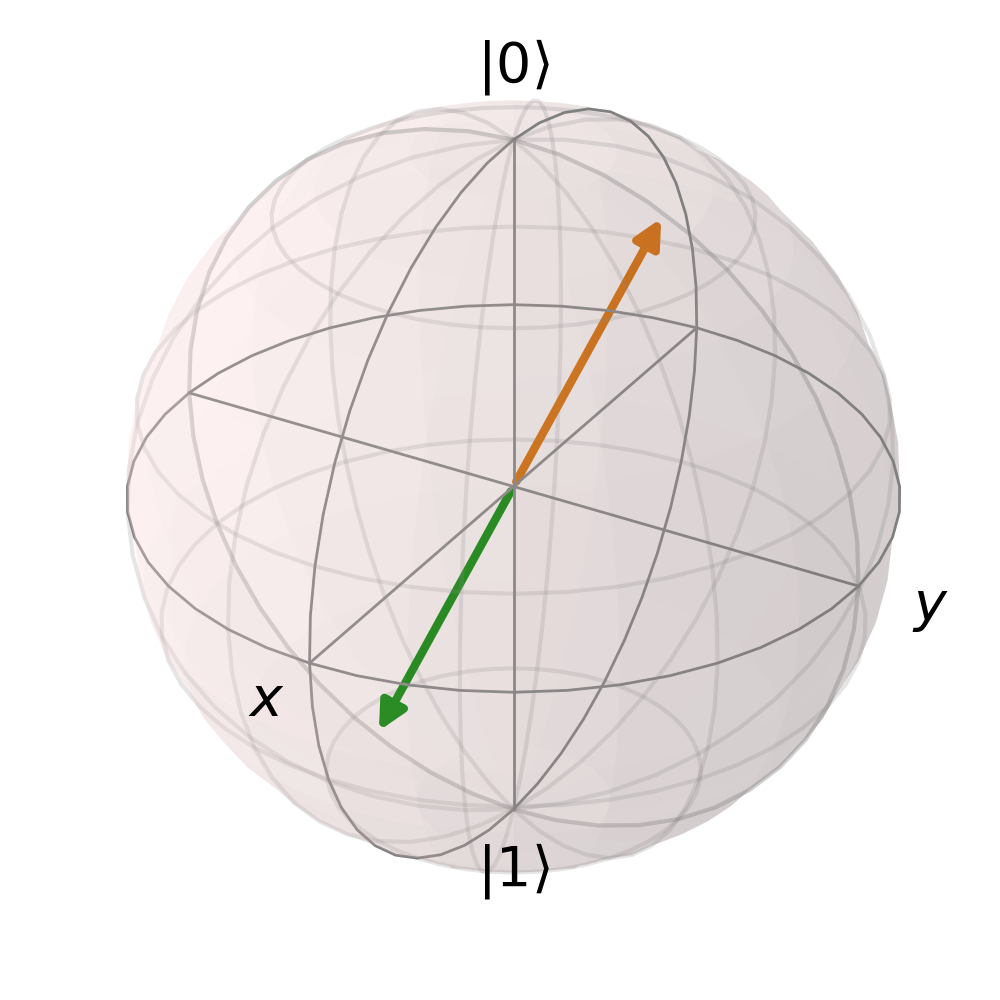

In [4]:
# initialize zero and one ket and NOT gate
zero_ket = basis(2,0)
one_ket = basis(2,1)
X_gate = Qobj([[0,1],[1,0]])

# initialize input state as mentionned
inpt_state = 0.22 * zero_ket - 1j * 0.9755 * one_ket

# compute output state as NOT gate acting on input
oupt_state = X_gate * inpt_state

# show that the NOT gate acting on input state flips
# zero and one ket
display(inpt_state)
display(oupt_state)

# initialize Bloch sphere and add both states
sphere = Bloch()
sphere.add_states([inpt_state, oupt_state])
sphere.show() # yes, it did flip the state

*The Z gate*: As the name suggests, this gate is represented by the Pauli-Z matrix. It represents the rotaion of a qubit along the z axis of a Bloch sphere by $\pi$ radians. 

(b) Using the same input qubit as above, find the output qubit after performing an operation of the Z-gate and show both the input and output states on the Bloch sphere. Also, show the matrix representation of the Z gate.

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.22+0.j    ]
 [0.  -0.9755j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.22+0.j    ]
 [0.  +0.9755j]]

<IPython.core.display.Javascript object>


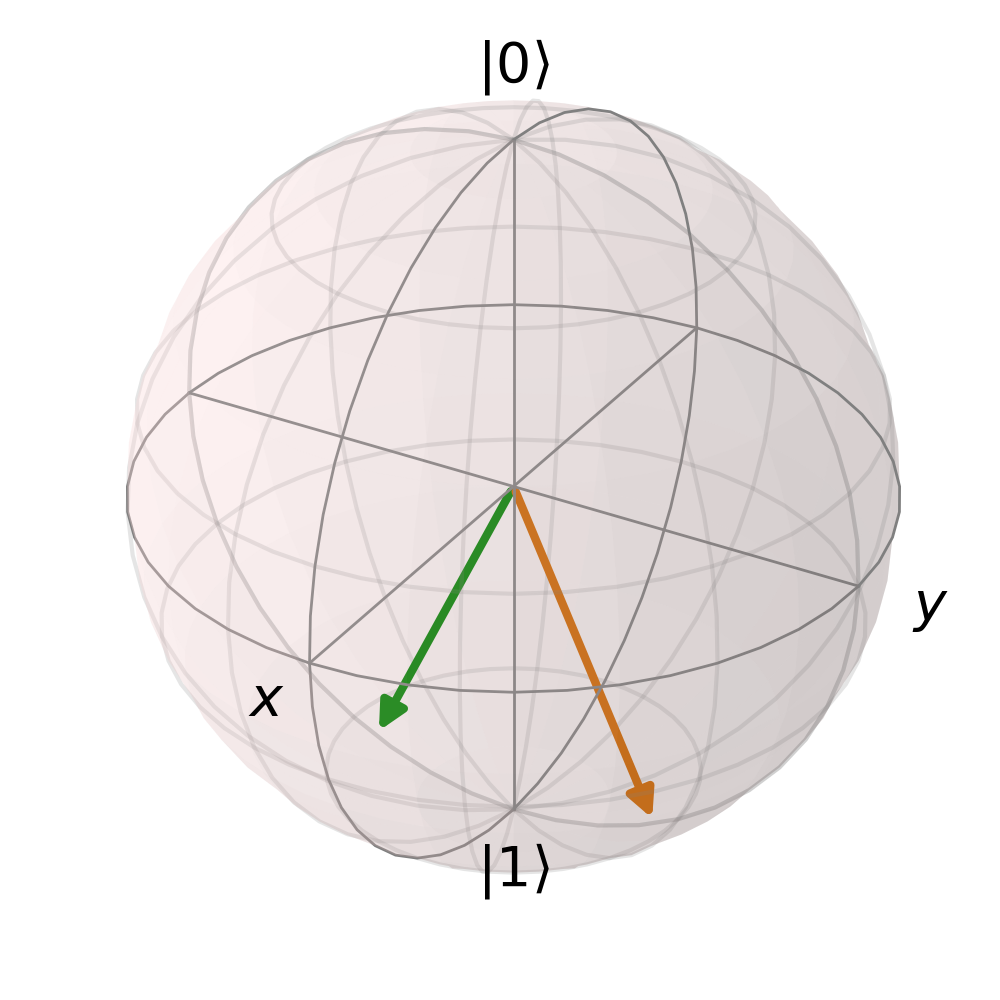

In [7]:
# initialize Z gate in matrix form and display it as asked
Z_gate = Qobj([[1,0],[0,-1]])
display(Z_gate)

# compute output state as Z-gate acting on inpt
oupt_state2 = Z_gate * inpt_state

# display inpt and output state
display(inpt_state)
display(oupt_state2)

# initialize Bloch sphere and add both states
sphere1 = Bloch()
sphere1.add_states([inpt_state, oupt_state2])
sphere1.show() # yes, it did rotate the state

*The Hadamard Gate*: Also known as the H gate, the Hadamard gate is one of the most useful quantum gates as the result of this operation on $\vert 0 \rangle$ or $\vert 1 \rangle$ is a superposition of $\vert 0 \rangle$ and $\vert 1 \rangle$ with equal weight. This gate is sometimes also refered to as the square-root of NOT gate. The H gate can be created using the Pauli-X (NOT) and Pauli-Z gates, i.e., $H = \frac{X + Z}{\sqrt{2}}$.

(c) Create the H gate and print its matrix representation. Operate it on the $\vert 0 \rangle$ and $\vert 1 \rangle$ states and find the output states. Also, show the input and output states on a Bloch sphere.

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]

<IPython.core.display.Javascript object>


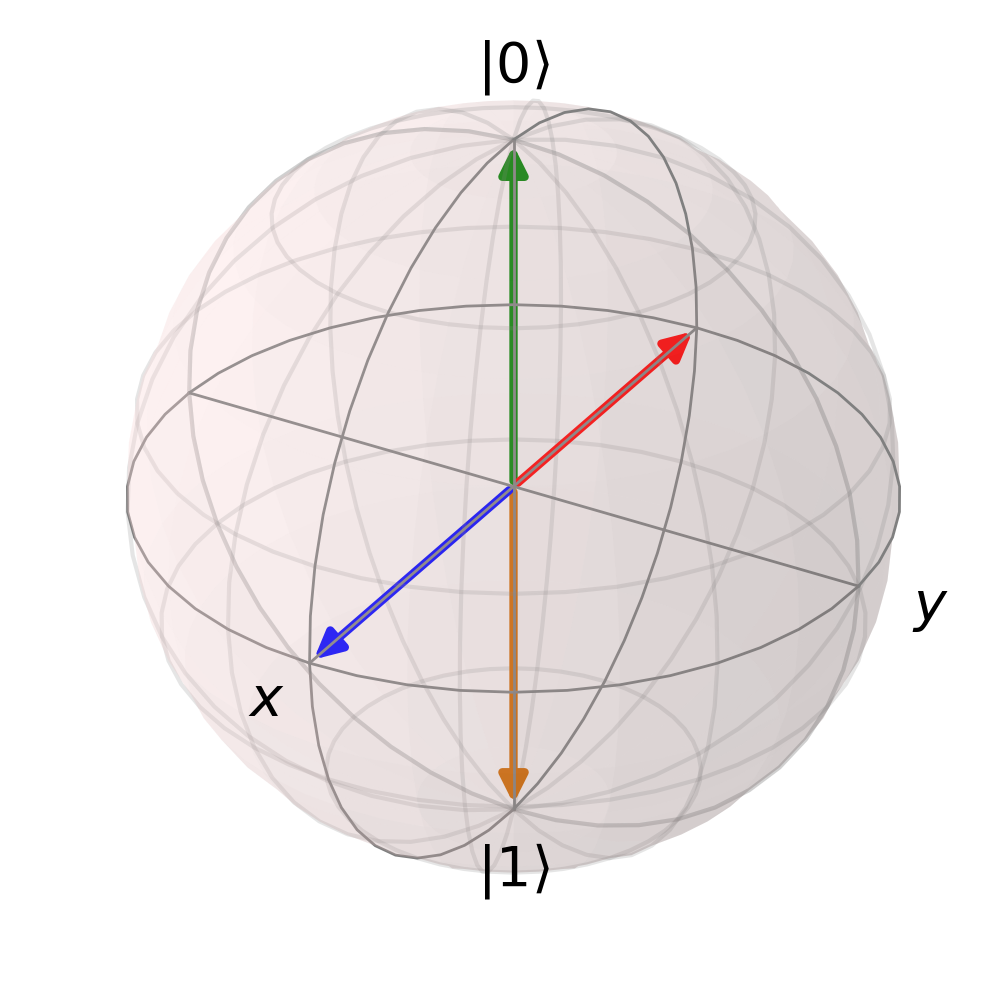

In [8]:
# generate matrix representation of Hadamard gate
# and display it as asked
H = (X_gate + Z_gate) / math.sqrt(2)
display(H)

# display input states, they are only the
# zero and one ket
display(zero_ket)
display(one_ket)

# compute the output states for both input states
zero_ket_oupt = H * zero_ket
one_ket_oupt = H * one_ket

# display the output states of the operation of
# H on input states
display(zero_ket_oupt)
display(one_ket_oupt)

# initialize Bloch sphere and add both input and output states
sphere2 = Bloch()
sphere2.add_states([zero_ket,one_ket,zero_ket_oupt,one_ket_oupt])
sphere2.show()

(d) Now, operate on the state $\vert 0 \rangle$ twice, i.e. do the operation $H^2$. What result do you get? What does this tell you about H? 

*Hint: This property in fact applies to all single qubit quantum gates*

In [9]:
# get output state of double Hadamard operations
twice_H_oupt = H * H * zero_ket
display(twice_H_oupt)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

# What result do we get and what does it mean:
We get back the zero_ket, as can be shown printed above. This shows that the Hadamard gate is a reversible gate, and we have proven in class that this property applies to all single qubit quantum gates, that is all single qubit quantum gates are reversible.

#### 2. Multiple Qubit Gates

As we have seen in class, there are a few important 3-qubit quantum gates that can be decomposed into many 2-qubit quantum gates. We will explore this here by asking you to build up the Toffoli gate, which is a 3-qubit quantum gate, out of 2-qubit quantum gates in a few different ways. We will also ask you to build the 2-qubit swap gate out of smaller pieces.

You may find the following documentation helpful:
http://qutip.org/docs/3.1.0/modules/qutip/qip/gates.html


We will warm up with a commented example of how to create a circuit using QuTiP. Be careful following the documentation so that you know where the target and controls go! The following code creates the circuit:
![hyperlink](https://www.dropbox.com/s/8wxyhc9yondhn8z/ReverseCNOT.png?raw=1)

In [10]:
N = 2 # 2-qubits
qc_ex = QubitCircuit(N) # Initialize quantum circuit with 2 qubits

# Add Gates
qc_ex.add_gate("SNOT", 0) # Hadamard acting on first qubit (note zero-indexing)
qc_ex.add_gate("SNOT", 1) # Hadamard acting on second qubit
qc_ex.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
qc_ex.add_gate("SNOT", 0) # Hadamard acting on first qubit
qc_ex.add_gate("SNOT", 1) # Hadamard acting on second qubit

# Find product of gates
U_ex = gate_sequence_product(qc_ex.propagators())

# Print Example
print(U_ex.tidyup())

print(cnot(2, 1, 0))

U_ex.tidyup() == cnot(2,1,0)

# Notice that by applying Hadamards to all inputs and outputs, you flip the target
# and control qubits. This is a neat identity that shows up from time to time. 

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


True

a) Recall that we may write the swap gate as:

![hyperlink](https://www.dropbox.com/s/jo55tx5m64yv4yz/SwapGate.png?raw=1)

Using a method similar to the example, create the SWAP gate for a 2-qubit circuit using CNOT gates. Make sure it is the same as QuTiP's SWAP gate. 

In [11]:
# note: the control/target values in example code are swapped
# the swap gate S swaps two qubits
N = 2 # we have 2-qubits for Swap
swap_circuit = QubitCircuit(N) # Initialize quantum circuit with 2 qubits

# add gates
swap_circuit.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
swap_circuit.add_gate("CNOT", 0, 1) # CNOT with target 0 and control 1
swap_circuit.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0

# find product of gates
S_gate = gate_sequence_product(swap_circuit.propagators())

# print our S gate and print the QuTip S gate
display(S_gate.tidyup())
display(qutip.qip.gates.swap())

# check that they are equal
S_gate.tidyup() == qutip.qip.gates.swap() # yes they are equal

# Notice that by applying the S gate, we flip the two qubits.

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

True

b) One way that we can decompose the Toffoli gate is:

![hyperlink](https://www.dropbox.com/s/0wokvlj24v97v73/Toffoli1.png?raw=1)


Create the Toffoli Gate for a 3-qubit circuit using Hadamard gates, controlled phase gates, and CNOT gates. Make sure it is the same as QuTiP's Toffoli gate. 

In [12]:
# the Toffoli gate operates on 3 qubits and is a universal gate
N = 3 # we have 3-qubits for Toffoli
Toffoli_circuit = QubitCircuit(N) # Initialize quantum circuit with 2 qubits

# add gates
Toffoli_circuit.add_gate("SNOT", 2) # Hadamard acting on third qubit
Toffoli_circuit.add_gate("CPHASE", 2, 1, arg_value=np.pi/2) # Controlled Phase with target 2 and control 1
Toffoli_circuit.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
Toffoli_circuit.add_gate("CPHASE", 2, 1, arg_value=-np.pi/2) # Dagger of Controlled Phase with target 2 and control 1
Toffoli_circuit.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
Toffoli_circuit.add_gate("CPHASE", 2, 0, arg_value=np.pi/2) # Controlled Phase with target 2 anad control 0
Toffoli_circuit.add_gate("SNOT", 2) # Hadamard acting on third qubit

# find product of gates
Toffoli_gate = gate_sequence_product(Toffoli_circuit.propagators())

# print our S gate and print the QuTip S gate
display(Toffoli_gate.tidyup())
display(qutip.qip.gates.toffoli())

# check that they are equal
Toffoli_gate.tidyup() == qutip.qip.gates.toffoli() # yes they are equal

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

True

c) We may also decompose the Toffoli gate as follows:

![hyperlink](https://www.dropbox.com/s/510vmxjr9nsvvdy/Toffoli2.png?raw=1)


Notice how the above circuit does not require any 2-qubit gates besides CNOT. Repeat the above using this more complicated circuit. You should only need SNOT, CNOT, and PHASEGATE. Hopefully, by the end of this, you will be comfortable creating circuits in QuTiP! Again, be careful with control vs. target qubits and the value of the parameter for PHASEGATEs. 

In [13]:
# the Toffoli gate operates on 3 qubits and is a universal gate
# we build it this time using the more complicated circuit displayed above
N = 3 # we have 3-qubits for Toffoli
Toffoli_circuit2 = QubitCircuit(N) # Initialize quantum circuit with 2 qubits

# add gates
# The T gate is the phase gate with theta=pi/4 and T dagger with theta=-pi/4
Toffoli_circuit2.add_gate("SNOT", 2) # Hadamard acting on third qubit
Toffoli_circuit2.add_gate("CNOT", 2, 1) # CNOT with target 2 and control 1
Toffoli_circuit2.add_gate("PHASEGATE", 2, arg_value=-np.pi/4) # T dagger with target 2
Toffoli_circuit2.add_gate("CNOT", 2, 0) # CNOT with target 2 and control 0
Toffoli_circuit2.add_gate("PHASEGATE", 2, arg_value=np.pi/4) # T with target 2
Toffoli_circuit2.add_gate("CNOT", 2, 1) # CNOT with target 2 and control 0
Toffoli_circuit2.add_gate("PHASEGATE", 2, arg_value=-np.pi/4) # T dagger with target 2
Toffoli_circuit2.add_gate("CNOT", 2, 0) # CNOT with target 2 and control 0
Toffoli_circuit2.add_gate("PHASEGATE", 2, arg_value=np.pi/4) # T with target 2
Toffoli_circuit2.add_gate("PHASEGATE", 1, arg_value=-np.pi/4) # T dagger with target 1
Toffoli_circuit2.add_gate("SNOT", 2) # Hadamard acting on third qubit
Toffoli_circuit2.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
Toffoli_circuit2.add_gate("PHASEGATE", 1, arg_value=-np.pi/4) # T dagger with target 1
Toffoli_circuit2.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
Toffoli_circuit2.add_gate("PHASEGATE", 0, arg_value=-np.pi/4) # T with target 0
Toffoli_circuit2.add_gate("PHASEGATE", 1, arg_value=np.pi/2) # S with target 1

# find product of gates
Toffoli_gate2 = gate_sequence_product(Toffoli_circuit.propagators())

# print our S gate and print the QuTip S gate
display(Toffoli_gate2.tidyup())
display(qutip.qip.gates.toffoli())

# check that they are equal
Toffoli_gate2.tidyup() == qutip.qip.gates.toffoli() # yes they are equal

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

True

#### 3. Quantum Circuit (Deutsch's Algorithm)

Below is a circuit representation of Deutsch's algorithm, which is one of the simplest quantum algorithms illustrating both quantum parallelism and quantum interference. We'll see what that means in this exercise.

![title](Deutsch_Circuit.jpg)

Let's focus on the $U_f$ gate at the center of the circuit. Here $f(x): \{0,1\}\rightarrow\{0,1\}$ is a function with a one-bit domain and range, and the $\oplus$ symbol indicates addition modulo 2. (For example, $0\oplus0=0, 1\oplus 0= 1, 0\oplus 1 = 1,$ and $1 \oplus 1 = 0$.) The gate $U_f$ performs the mapping $|x, y\rangle \rightarrow |x, y\oplus f(x)\rangle$. You'll explicitly construct this gate for a particular function $f$ below.

(a) Construct the state $|\psi_0\rangle$ in QuTiP.

In [14]:
# we construct the state psi_0
# this state has 2 qubits
first_qubit = zero_ket
second_qubit = one_ket

# making psi_0
psi_0 = tensor(first_qubit, second_qubit)
display(psi_0)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

(b) Find the state $|\psi_1\rangle$ by applying the appropriate gate(s) to the state you found in part (a).

In [15]:
# first make psi_1 qubit by qubit
# we construct the state psi_1
# this state has two qubit, where each qubit was applied
# the Hadamard gate
psi_1_first_qubit = H * first_qubit
psi_1_second_qubit = H * second_qubit

# making psi_1
psi_1 = tensor(psi_1_first_qubit, psi_1_second_qubit)
display(psi_1)

# making psi_1 using a gate that acts on both
# qubits at the same time to show the equivalence
psi1 = tensor(H,H) * psi_0
display(psi1) # they are equivalent

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]

(c) Consider the function
\begin{equation}
f(x) = \left\{
\begin{array}{c}
1 \text{ if }x = 0 \\
0 \text{ if }x = 1.
\end{array}
\right.
\end{equation}
Construct the gate $U_f$ in QuTiP.

In [16]:
# U_f takes in two qubits. It does nothing to the first qubit, 
# returns it as it was given, and for the second qubit it returns
# the XOR of f(first_qubit) and second_qubit
# XOR(second_qubit, f(first_qubit)), where f is the NOT gate

# This is our truth table for the whole gate:
# x y --> x (y XOR (NOT x))
# 0 0 --> 0 1
# 0 1 --> 0 0
# 1 0 --> 1 0
# 1 1 --> 1 1

N = 2 # we have 2-qubits for U_f
U_f_circuit = QubitCircuit(N) # Initialize quantum circuit with 2 qubits

# add gates
U_f_circuit.add_gate("NOT", 0) # CNOT with target 0
U_f_circuit.add_gate("CNOT", 1, 0) # CNOT with target 1 and control 0
U_f_circuit.add_gate("NOT", 0) # CNOT with target 0

# find product of gates
U_f_gate = gate_sequence_product(U_f_circuit.propagators())

# print our S gate and print the QuTip S gate
display(U_f_gate.tidyup())

# proof that our gate fits the truth table written above
display(U_f_gate * tensor(zero_ket, zero_ket))
display(U_f_gate * tensor(zero_ket, one_ket))
display(U_f_gate * tensor(one_ket, zero_ket))
display(U_f_gate * tensor(one_ket, one_ket))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

(d) Using the results of (b) and (c), find the state $|\psi_2\rangle$.

In [17]:
# we construct the state psi_2
# this state has two qubits, where the qubits
# are applied the U_f gate

# build psi_2 and output it
psi_2 = U_f_gate * psi_1
display(psi_2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]
 [-0.5]
 [ 0.5]]

(e) Finally, apply a Hadamard gate to the first qubit to find the final state $|\psi\rangle$.

In [18]:
# we construct the state psi_3
# this state has two qubits, where the first
# qubit is applied the Hadamard gate

# initialize "identity gate" so we can
# apply Hadamard to only the first qubit
I_gate = Qobj([[1,0],[0,1]])

# applying Hadamard to first qubit to find
# the final state and display it
psi_3 = tensor(H, I_gate) * psi_2
display(psi_3)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [-0.70710678]]

(f) Show that the state obtained in part (e) is equal to $\pm |f(0)\oplus f(1)\rangle \left[ \frac{|0\rangle - |1\rangle}{\sqrt{2}}\right]$. Is it a plus or a minus?

In [19]:
# verifying that our Deutsch output matches

# f(0) == NOT (0) = 1
# f(1) == NOT (1) = 0
# 1 XOR 0 --> 1 ==> |1> 
first_part = one_ket

# (zero_ket - one_ket) / sqrt(2) is the same as
# Hadamard applied on one_ket
second_part = H * one_ket

# oupt_state with a plus
plus_oupt_state = tensor(first_part, second_part)
display(plus_oupt_state)
# oupt_state with a minus
minus_oupt_state = -1 * tensor(first_part, second_part)
display(minus_oupt_state)

# output_state with a plus matches. It is a plus

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [-0.70710678]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.70710678]]